In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics
from sklearn.datasets import make_blobs

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)
%matplotlib notebook

# Machine Learning (ML)

# Algunas herramientas adicionales

Antes de avanzar con los modelos de ML, a continuación se realiza un breve análisis de algunas herramientas de uso común en el ámbito del ML como lo son la estandarización de los datos y mejores prácticas de imputación.

### Más estrategias para el manejo de valores nulos
Existen múltiples estrategias para realizar el proceso de imputación. Las más simples de ellas no suelen considerar la relación existente entre diferentes características del conjunto de datos como SimpleImputer, otras, más avanzadas, toman en cuenta dicha relación, tales como KNNImputer  e IterativeImputer, las cuales son métodos multivariados, pues requieren más de una característica para poder realizar la imputación. 

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [3]:
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
# Una pequeña limpieza
# Columnas del DataFrame
df.columns = df.columns.str.replace("-", "_")
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_L/100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

In [5]:
# Las columnas con algún valor nulo
df.isna().sum()[df.isna().sum()>=1]

stroke               4
horsepower_binned    1
dtype: int64

Con el fin de mostrar mejor las estrategias para la imputación, a continuación se crearán más valores nulos de manera aleatoria en el DataFrame para la columna *stroke*.

<IPython.core.display.Javascript object>


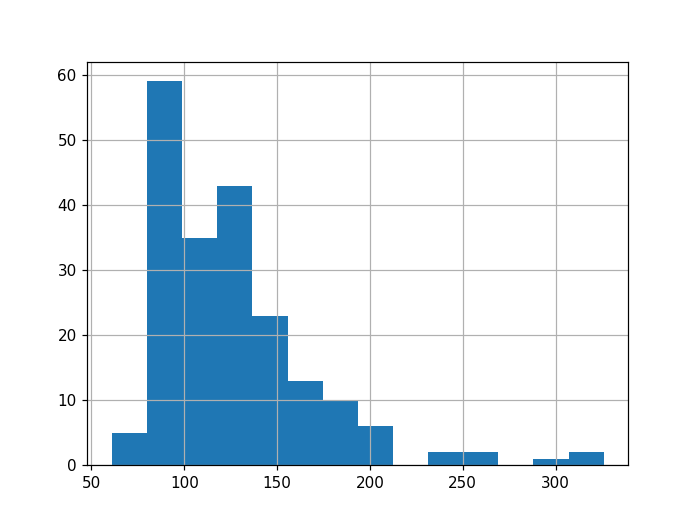

In [6]:
# Distribución para la característica (feature) a estudiar
feature = "engine_size"
df[feature].hist(bins=int(np.sqrt(df.shape[0])))
plt.show()

A continuación, para poder tener algunos valores nulos con los que trabajar, se elige aleatoriamente el 10% de los índices del DataFrame para la columna elegida (feature).

In [7]:
np.random.seed(1234)
idx_na = np.random.choice(df.index, size=int(0.1*df.shape[0]))
idx_na

array([ 47,  38,  53, 116, 152, 143, 177,  23, 154,  30, 171, 158, 124,
        26, 118, 186, 120, 112,  69,  80])

In [8]:
# Se asignan valores nulos a los índices elegidos (para feature)
df.loc[idx_na, feature] = np.nan

Una buena idea sería poder visualizar los valores nulos en cada columna, para esto se puede utilizar la librería missingno.

In [9]:
# !pip install missingno
import missingno as msno

<IPython.core.display.Javascript object>


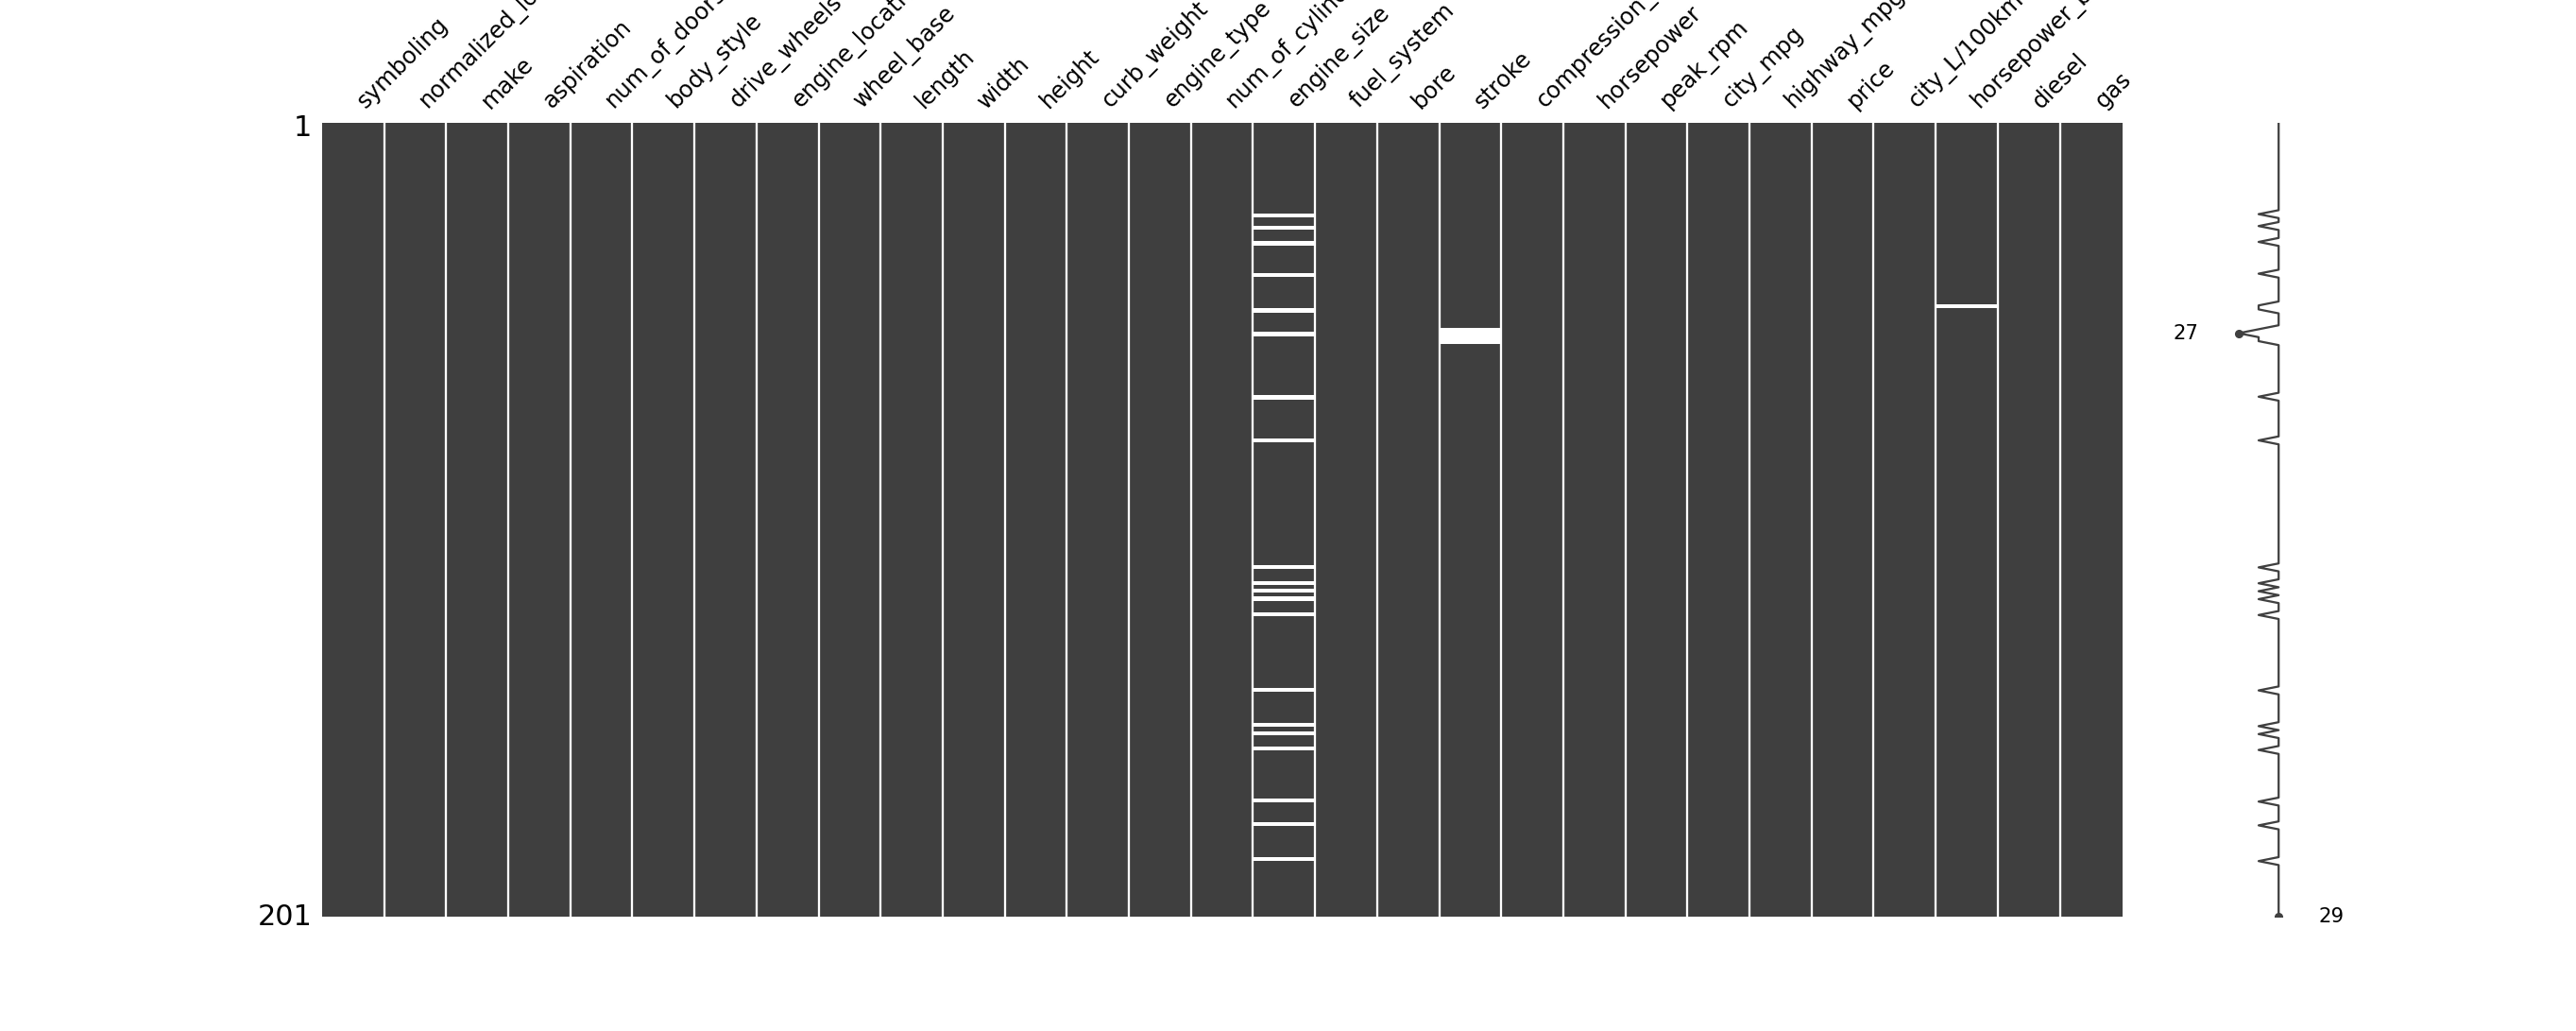

In [10]:
msno.matrix(df)
plt.show()

#### SimpleImputer: Imputando con la media, moda, mediana o valores constantes

Para realizar la imputación de valores nulos se pueden utilizar la media, moda, mediana o valores constantes. En estos casos una buena opción es utilizar el *SimpleImputer* de *Sklearn*. 

In [11]:
# Instanciando el SimpleImputer
simple_imputer = SimpleImputer(strategy="mean")
print(f"{feature} {simple_imputer.strategy} = {df[feature].mean()}")

engine_size mean = 127.79558011049724


In [12]:
# Estimación y transformación
feature_tsi = pd.DataFrame(simple_imputer.fit_transform(df[feature].values.reshape(-1,1)))
feature_tsi

,0
0,130.0
1,130.0
2,152.0
3,109.0
4,136.0
...,...
196,141.0
197,141.0
198,173.0
199,145.0


In [13]:
# Todos los valores nulos se reemplazan utilizando la estrategia indicada
feature_tsi.loc[idx_na]

,0
47,127.79558
38,127.79558
53,127.79558
116,127.79558
152,127.79558
143,127.79558
177,127.79558
23,127.79558
154,127.79558
30,127.79558


<IPython.core.display.Javascript object>


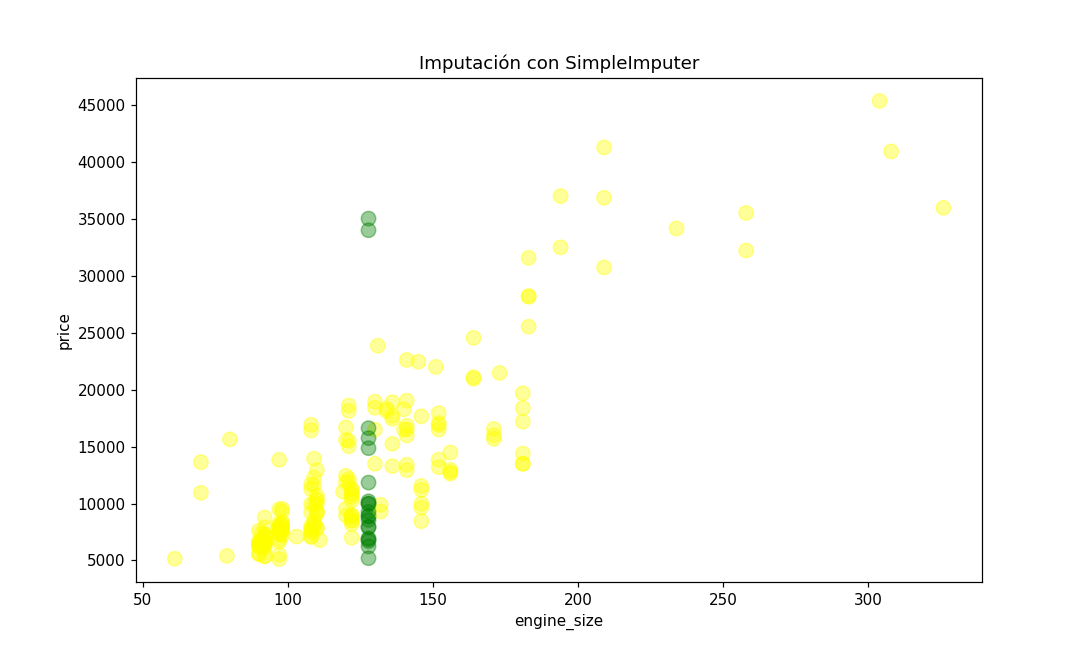

In [14]:
# Representación de la feature utilizada en relación con el precio
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=feature_tsi, y=df["price"],
           c=["green" if i==True else "yellow" for i in df[feature].isna()],
           alpha=0.4, s=90)

ax.set_xlabel(feature)
ax.set_title("Imputación con SimpleImputer")
ax.set_ylabel("price")
plt.show()

#### K-Nearest Neighbour
Otra de las alternativas del módulo *impute* de sklearn es la utilización de K-Nearest Neighbour. Este método permite realizar la imputación utilizando la media de los K "vecinos" más cercanos al valor nulo en el conjunto de datos. Para poder determinar los K vecinos el algoritmo necesita un conjunto de datos con múltiples características. 

In [15]:
# Estimación y transformación
knn_imputer = KNNImputer(n_neighbors=5, weights="distance")
feature_tknn = pd.DataFrame( 
                    knn_imputer.fit_transform( df.loc[:, ["price", feature]] )
                            )
                           
feature_tknn = pd.DataFrame(feature_tknn.loc[:,1])

In [16]:
feature_tknn.loc[idx_na]

,1
47,78.553652
38,122.000000
53,120.707924
116,98.000000
152,100.044470
143,118.786844
177,133.892544
23,90.000000
154,92.000000
30,97.937758


<IPython.core.display.Javascript object>


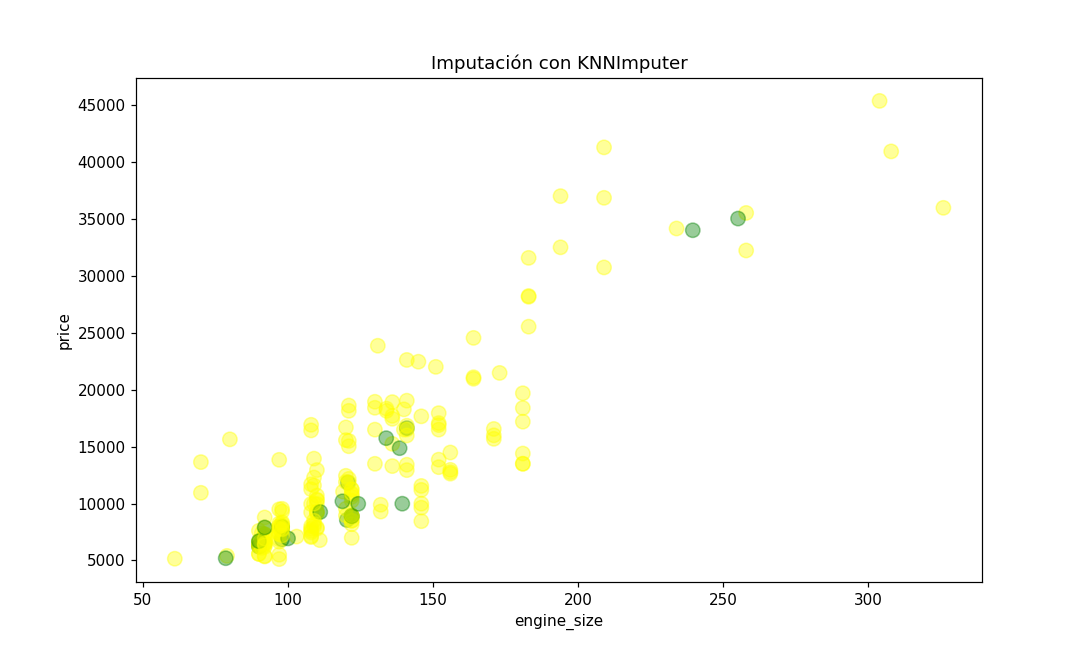

In [17]:
# Representación de la feature utilizada en relación con el precio
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=feature_tknn, y=df["price"],
           c=["green" if i==True else "yellow" for i in df[feature].isna()],
           alpha=0.4, s=90)

ax.set_xlabel(feature)
ax.set_title("Imputación con KNNImputer")
ax.set_ylabel("price")
plt.show()

#### IterativeImputer
Uno de los métodos más relevantes a la hora de imputar valores nulos es IterativeImputer. Este método modela la feature con valores nulos (el target *y*) a partir de las demás features (*X*), para esto utiliza el parámetro *estimator* como método de regresión en cada iteración durante la imputación, utiliza Round Robin Fashion como estrategia para imputar. 

In [18]:
# IterativeImputer puede recibir un estimador para utilizar en cada iteración
# por defecto utiliza BayesianRidge
linear = LinearRegression()
iter_imputer  = IterativeImputer(estimator=linear)
feature_tIter = pd.DataFrame( 
                    iter_imputer.fit_transform( df.loc[:, ["price", feature]] )
                            )
                           
feature_tIter = pd.DataFrame(feature_tIter.loc[:,1])

In [19]:
feature_tIter.loc[idx_na]

,1
47,90.529548
38,107.247599
53,120.988463
116,103.180303
152,98.512990
143,113.444728
177,138.874487
23,95.265566
154,102.910066
30,98.132826


<IPython.core.display.Javascript object>


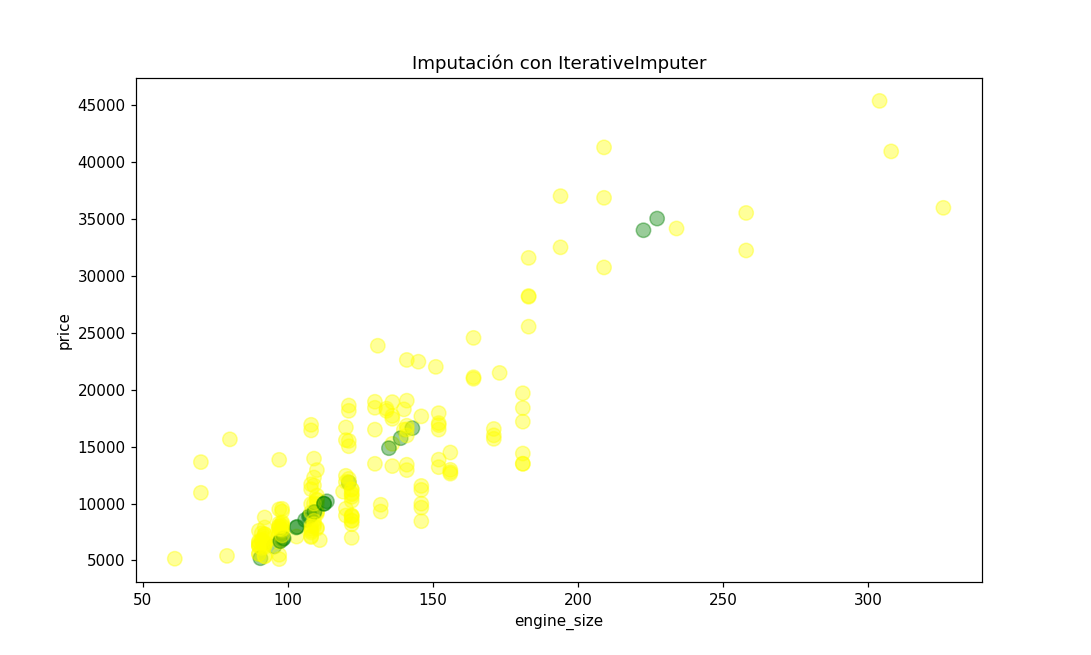

In [20]:
# Representación de la feature utilizada en relación con el precio
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=feature_tIter, y=df["price"],
           c=["green" if i==True else "yellow" for i in df[feature].isna()],
           alpha=0.4, s=90)

ax.set_xlabel(feature)
ax.set_title("Imputación con IterativeImputer")
ax.set_ylabel("price")
plt.show()

### Escalado de las features

Es habitual que se tengan características con valores muy contrastantes, unos muy altos y otros muy bajos, esto puede representar un problema para los algorítmos de ML. Por esta razón se hace necesario la existencia de herramientas que permitan re-escalar los valores de las features. 

El módulo sklearn.preprocessing provee múltiples métodos para realizar este procedimiento. A continuación algunas herramientas:

#### Normalización  
Reescala la feature indicada a un rango entre 0 y 1, que se puede modificar utilizando el parámetro feature_range. 

$$
x'=\frac{x-x_{min}}{x_{max}-x_{min}}.
$$ 


In [21]:
# Procedimiento realizado para la normalización
(df[feature] - df[feature].min())/(df[feature].max() - df[feature].min())

0      0.260377
1      0.260377
2      0.343396
3      0.181132
4      0.283019
         ...   
196    0.301887
197    0.301887
198    0.422642
199    0.316981
200    0.301887
Name: engine_size, Length: 201, dtype: float64

In [22]:
# Normalización con MinMaxScaler
scaler_minMax    = MinMaxScaler()
scaled_feact_mm  = pd.DataFrame(scaler_minMax.fit_transform(df[[feature]]))
scaled_feact_mm

,0
0,0.260377
1,0.260377
2,0.343396
3,0.181132
4,0.283019
...,...
196,0.301887
197,0.301887
198,0.422642
199,0.316981


#### Estandarización:
La estandarización consiste en reescalar los valores de la feature a unidades de su desviación estandar $\sigma$, de modo que la desviación estandar de la columna transformada iguala a uno y su media es cero. 
$$
    x'=\frac{x-\bar x}{\sigma}
$$

In [23]:
# Procedimiento realizado para la estandarización
(df[feature] - df[feature].mean())/(df[feature].std())

0      0.052784
1      0.052784
2      0.579565
3     -0.450053
4      0.196452
         ...   
196    0.316175
197    0.316175
198    1.082402
199    0.411953
200    0.316175
Name: engine_size, Length: 201, dtype: float64

In [24]:
scaler_stds = StandardScaler()
scaled_feact_stds = pd.DataFrame(scaler_stds.fit_transform(df[[feature]]))
scaled_feact_stds

,0
0,0.052930
1,0.052930
2,0.581173
3,-0.451301
4,0.196997
...,...
196,0.317052
197,0.317052
198,1.085405
199,0.413096


In [25]:
# Los datos estandarizados tendrán media de cero (o muy cercana) y desviación estandar de 1 (o muy cercana)
print(f"media={round(scaled_feact_stds.mean()[0],3)} std={round(scaled_feact_stds.std()[0],3)}")

media=-0.0 std=1.003


### Conversión de features categóricas a numéricas
Suele ser necesario convertir una columna de tipo categórico a numérica, hacer esto suele generar columnas adicionales dependiendo de la cantidad de características presentes en la columna. Sklearn ofrece múltiples opciones para realizar este procedimiento, aunque pandas también permite hacerlo por medio de sus dummies.

In [26]:
df.select_dtypes("O").columns

Index(['make', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system',
       'horsepower_binned'],
      dtype='object')

In [27]:
df.drive_wheels.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

#### Con pandas

In [28]:
pd.get_dummies(df.drive_wheels)

,4wd,fwd,rwd
0,False,False,True
1,False,False,True
2,False,False,True
3,False,True,False
4,True,False,False
...,...,...,...
196,False,False,True
197,False,False,True
198,False,False,True
199,False,False,True


#### OrdinalEncoder
Codifica las categorías asignando un número a cada una.

In [29]:
encoder_ord = OrdinalEncoder()
df_drive_wheels_ord = pd.DataFrame(encoder_ord.fit_transform(df[["drive_wheels"]]), dtype=int)
df_drive_wheels_ord

,0
0,2
1,2
2,2
3,1
4,0
...,...
196,2
197,2
198,2
199,2


#### OneHotEncoder
Codifica las categorías generando una nueva columna para cada una con valores boleanos (True si la instancia contiene la categoría, False en caso contrario). 

In [30]:
encoder_oh = OneHotEncoder(sparse_output=False, dtype=int)
df_drive_wheels_ohe = pd.DataFrame(
                        encoder_oh.fit_transform(df[["drive_wheels"]]),
                        columns=encoder_oh.get_feature_names_out(["drive_wheels"]))

df_drive_wheels_ohe

,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
196,0,0,1
197,0,0,1
198,0,0,1
199,0,0,1


# Métricas de regresión

Ya se ha estudiado el modelo de regresión lineal simple utilizando una o varias características como variables dependientes. A partir de este se encontraba el valor de los pesos $w_1, w_2,... w_n$ y un termino de sesgo $w_0$ que se utilizaban para realizar la suma ponderada de las features del modelo con el fin de predecir el target *y*:  

$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

El siguiente paso es determinar cantidades que permitan medir la eficacia del modelo, a estas se les conoce como métricas o también como funciones de costo y representan un valor promedio entre la distancia existente entre el plano (o hiperplano) establecido por el modelo y los puntos reales. El objetivo de un modelo de ML es lograr la menor distancia promedio posible por lo que el entrenamiento del modelo busca encontrar los valores de los pesos $w_i$ que minimicen dicha función de costo. Entre las métricas más populares encontramos:

* Error medio absoluto (MAE)

$$MAE = \frac{1}{m}\sum_{i=1}^{m}|\hat{y}_i -y_i|$$

No es tan sensible a outliers por lo que se le suele considerar como una métrica robusta y da una idea de la simetría de los residuos del modelo.

* Error cuadrático medio (MSE)

$$MSE=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}_i -y_i\right)^2$$

* Raíz del error cuadrático medio (RMSE)

$$RMSE=\sqrt{MSE} = \sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}({\bf x})_i -y_i\right)^2}$$

Es altamente sensible a los outliers del modelo por lo que no es tan robusto, pero da muy buenas ideas de cómo se comporta el modelo bajo estudio. 

* Error porcentual absoluto medio (MAPE)
$$MAPE = \frac{1}{m} \sum_{i=1}^{m}\left|\frac{\hat{y}({\bf x})_i -y_i}{y_i}\right|$$

Es una medida de error relativa que mide la diferencia promedio entre los valores predichos por el modelo y los reales. MAPE es sensible a pequeños valores de la variable dependiente, casos en los que puede dar un resultado excesivamente alto o, si por el contrario. MAPE se puede considerar como la versión ponderada de MAE. Es una métrica sensible a los valores relativos del modelo.

* Error de porcentaje cuadrático medio (MSPE) 

$$MSPE=\frac{1}{m}\sum_{i=1}^{m}\left(\frac{\hat{y}_i -y_i}{y_i}\right)^2$$
Es una métrica sensible a outliers y a pequeños valores de la variable dependiente. Se puede considerar como la versión ponderada de MSE.


* Coeficiente de determinación $R^2$
$$R^2 = \rho^2 = 1 - \frac{\sigma_r^2}{\sigma^2}$$

donde $\sigma_r^2$ es la varianza de los residuos del modelo y $\sigma^2$ es la varianza de la variable dependiente del modelo (y). Este explica la proporción de varianza (en la variable dependiente) que es explicada por el modelo. 


El módulo [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn provee varias opciones para trabajar con métricas. A continuación se aplican al modelo anterior.

# Regresión logística

Algunos algoritmos de regresión pueden ser usados para el problema de clasificación. La **Regresión Logística** se usa, comunmente, para determinar la probabilidad de que una instancia pertenezca a una clase particular. 

Supongamos que tenemos dos clases: clase A (clase positiva, etiquetada como 1) y clase B (clase negativa, etiquetada como 0). Si estimamos una probabilidad $\hat{p}$ en regresión logística, tenemos entonces que el problema de clasificación binario se trata de la siguiente forma:

\begin{equation*}
\hat{y} = \begin{cases}
1 &\hat{p}\geq0.5\\
0 &\hat{p}<0.5
\end{cases}
\end{equation*}

Sin entrar en detalles, la probabilidad estimada de $y$ dado x, es tal que 

\begin{equation}
\hat{p}=h_w(\mathbf{x})=\sigma(\mathbf{x}^T\mathbf{w})
\end{equation}

En donde, $\sigma(.)$ representa la función logística, o sigmoide, mediante la cual se obtiene un resultado que esta entre 0 y 1. En la regresión logística **la probabilidad se ajusta a una función sigmoide/logística para realizar el mapeo a probabilidades**. Esta función está definida por la ecuación:

\begin{equation}
\sigma(t)=\frac{e^{t}}{1+e^{-t}}
\end{equation}

La función sigmoide se ve como:

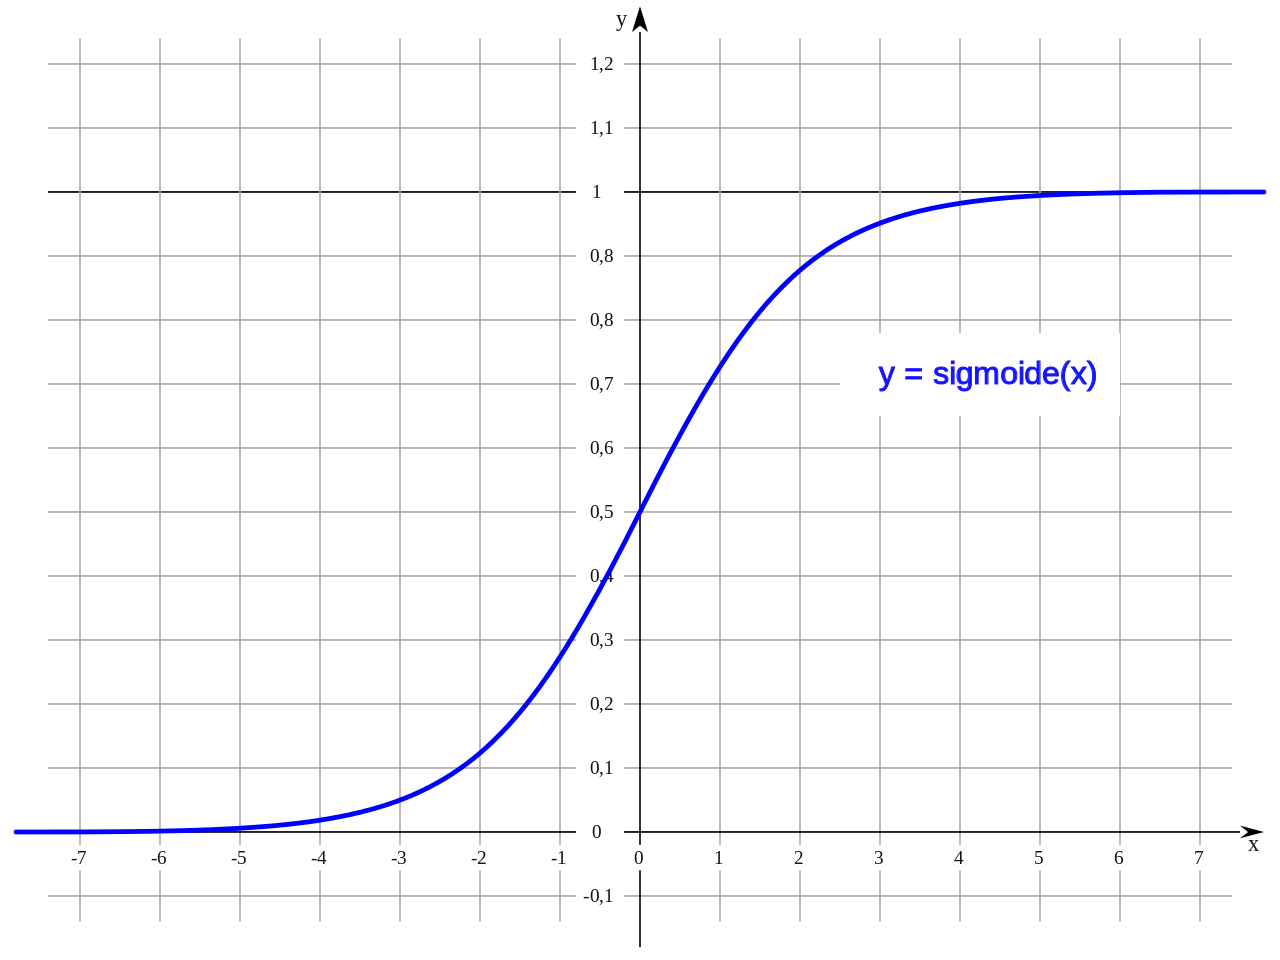

Observaciones:

* La función sigmoide tiende rápidamenta a cero para valores negativos.
* La función sigmoide tiende rápidamente a 1 para valores positivos.
* $\sigma(t)<0.5$ si $t<0$.
* $\sigma(t)\geq0.5$ si $t\geq0$.

De los dos últimos ítems se tiene que nuestro modelo de regresión logística predice un valor de 1 si $\mathbf{x}^T\mathbf{w}$ es positivo y cero si es negativo.

### La regresión logística y la regresión lineal

Recordemos que en la **regresión lineal** se determina una función que relaciona a una variable dependiente continua, con algunos predictores (variables independientes $x_1$, $x_2$, etc.). Por ejemplo, en la regresión lineal multiple se asume una función de la forma:


\begin{equation}
y = w_0 + w_1x_1 + w_2x_2 + \cdots
\end{equation}

en la que se determinan los valos de los parámetos $w$ que minimizan el error. Lo anterior puede generalizarse como:


\begin{equation}
ℎ_w(𝑥) = \sigma({\mathbf{x}^T\mathbf{w}}) 
\end{equation}

La regresión logística es una variación de la regresión lineal, la cual resulta útil en los casos en que la variable dependiente, es categórica. Como se mencionó, la regresión logística produce como resultado la probabilidad de que una instancia pertenezca a un clase dada.

La regresión logística ajusta entonces una curva en forma de "S", tomando la regresión lineal ($\mathbf{x}^T\mathbf{w}$) y transformando la estimación numérica en una probabilidad (entre 0 y 1), mediante la función sigmoide:

$$
ℎ_w(𝑥) = \sigma({\mathbf{x}^T\mathbf{w}}) =  \frac {e^{(w_0 + w_1  x_1 + w_2  x_2 +...)}}{1 + e^{(w_0 + w_1  x_1 + w_2  x_2 +\cdots)}}
$$

En esta ecuación se tiene que, $\mathbf{x}^T\mathbf{w}$ es el resultado de la regresión (es decir, la suma ponderada de las variables/características), $\sigma(\mathbf{x}^T\mathbf{w})$ es la [función logística](http://en.wikipedia.org/wiki/Logistic_function) aplicada a la suma ponderada.


El proposito del algoritmo de __Regresión Lógistica__ es el de encontrar los parámetros $\mathbf{w}$, para  $ℎ_w(𝑥)$ = $\sigma(\mathbf{x}^T\mathbf{w})$, de tal forma que el modelo prediga más precisamente la clase en cada caso.

El modelo de regresión logística representa entonces un algoritmo apliamente usado en clasificación binaria, en los casos en que la frontera de decisión sea lineal.

Veamos a continuación una aplicación de la regresión logística.

In [58]:
# Generación de un dataset de clasificación 2d de nubes de puntos.
X, y = make_blobs(n_samples=[1000,1000], centers=((0,0), (0,9)), n_features=2, cluster_std=3, random_state=1234)
df_2 = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df_2

,x,y,label
0,1.918898,-2.886086,0
1,-3.502561,0.122530,0
2,1.826337,-5.010251,0
3,-1.680279,0.494864,0
4,-0.557899,-0.707492,0
...,...,...,...
1995,1.347161,10.344944,1
1996,2.976034,6.209896,1
1997,3.359803,14.524940,1
1998,-4.151579,2.218344,0


<IPython.core.display.Javascript object>


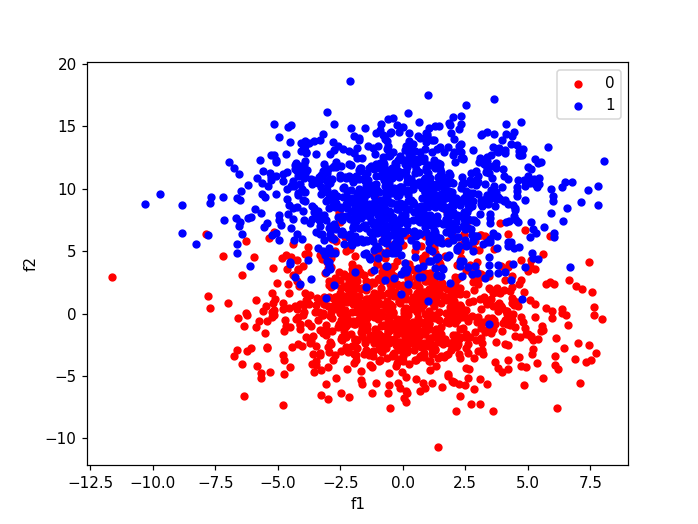

In [59]:
# scatter plot, dots colored by class value
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df_2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.ylabel('f2')
plt.xlabel('f1')
plt.show()

In [60]:
# 2.
# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [61]:
# 3. 
# Estimador y predictor
logisticR  = LogisticRegression(C=0.01, solver='liblinear')

# 4. Entrenamiento/Estimación
logisticR.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

<IPython.core.display.Javascript object>


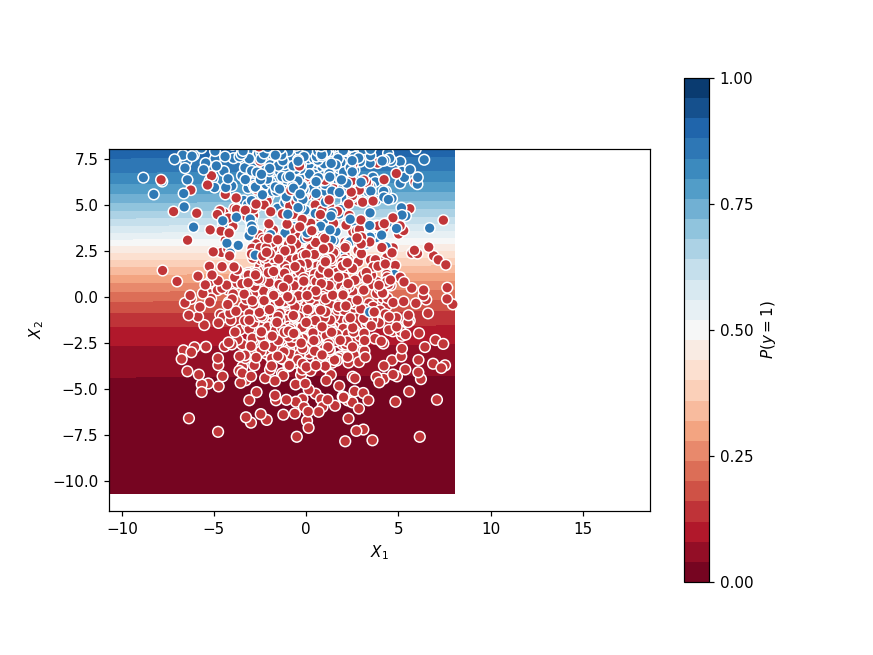

[None,
 (-10.690549981874206, 18.661705280075928),
 (-11.642695234009825, 8.039561127095535),
 Text(0.5, 0, '$X_1$'),
 Text(0, 0.5, '$X_2$')]

In [62]:
xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logisticR.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[1], X.max(0)[1]), ylim=(X.min(0)[0], X.max(0)[0]),
       xlabel="$X_1$", ylabel="$X_2$")

In [63]:
logisticR.score(X, y)

0.9105